In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets")
df=pd.read_excel("Data_Train.xlsx",sheet_name="Sheet1")

#pd.set_option('display.max_rows', None)
df_test=pd.read_excel("Test_set.xlsx",sheet_name="Sheet1")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_test.shape

(2671, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Understanding what is the data available in df
categorial_features = df.select_dtypes(include=[np.object])
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
    

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


In [6]:
df.shape

(10683, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### EDA Needed for this Data Set
1.Encoding

2.Imputing the missing data- As it is only one missing row, prefer to drop the missing row

3.define the column types like data, time


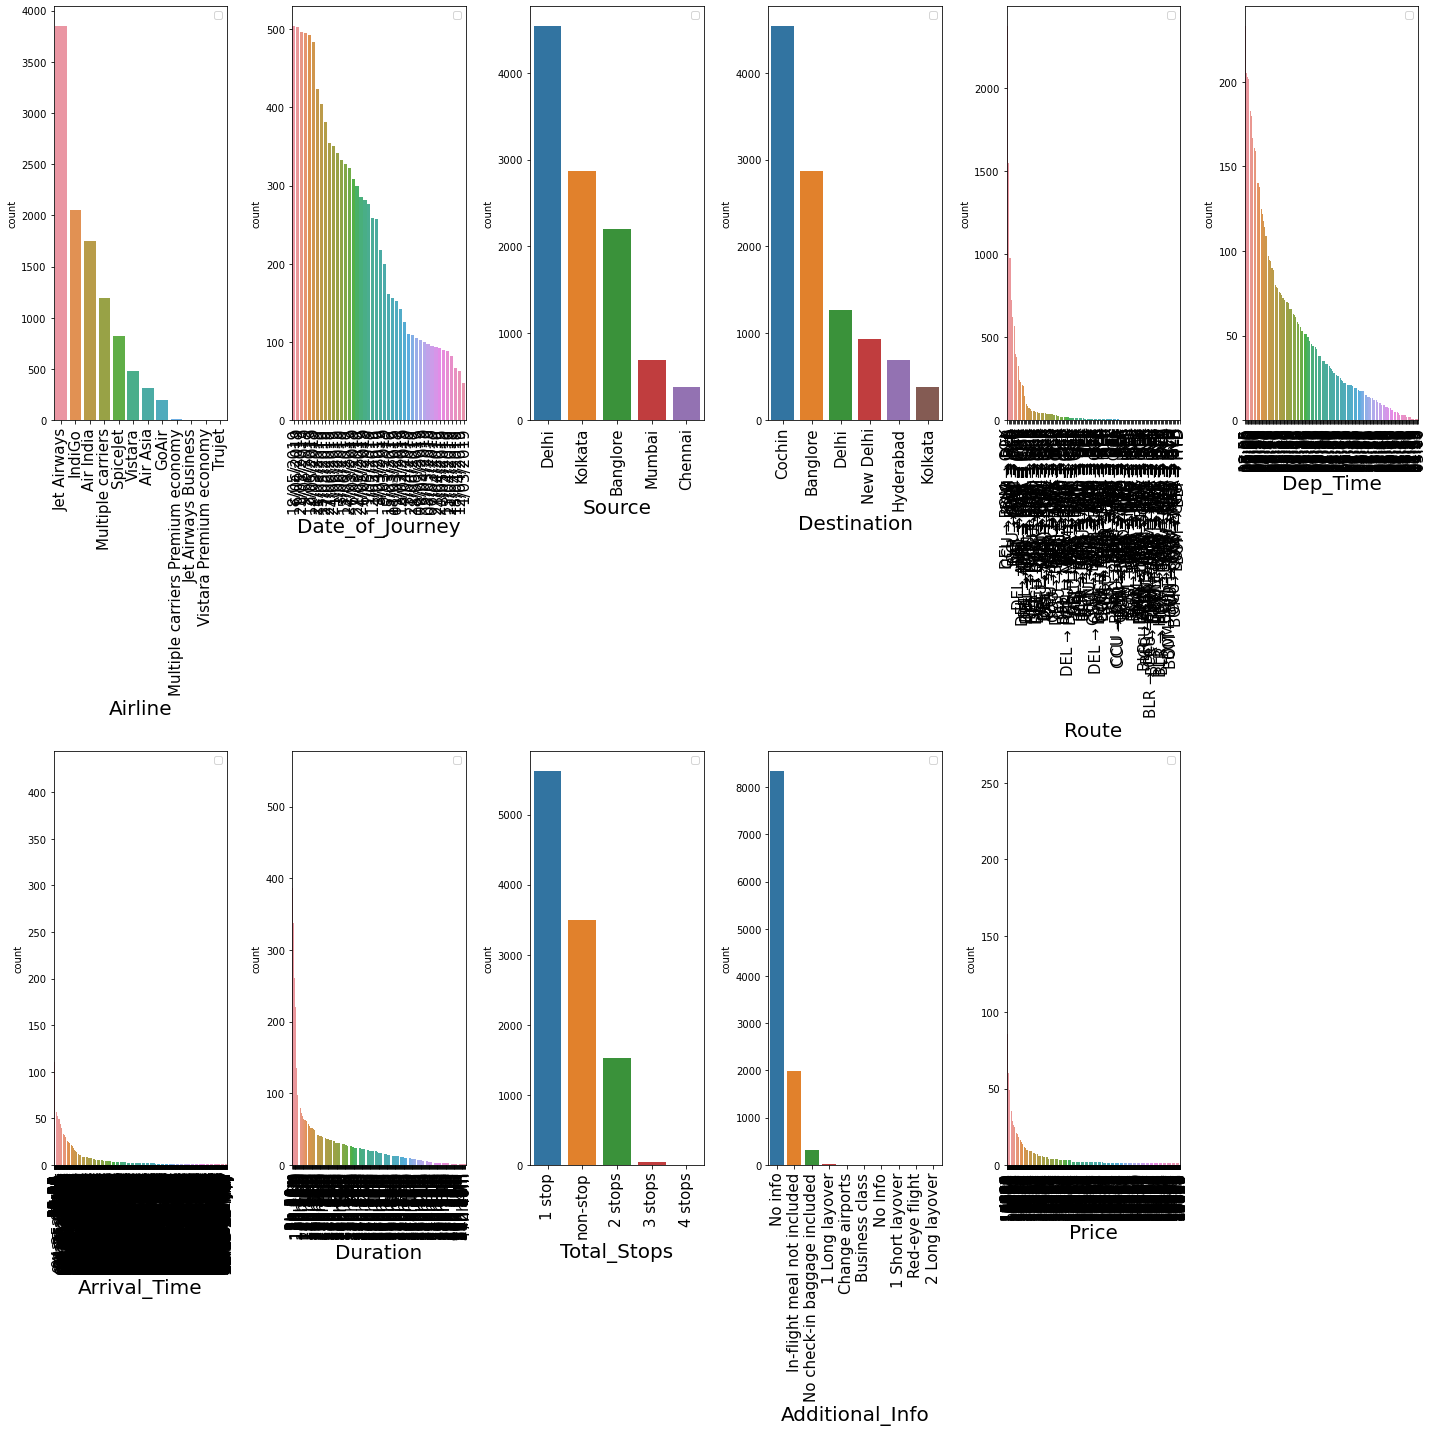

In [9]:
#Checking the catogorical data and there distribution and frequency
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.countplot(x=df[column], data=df,order=df[column].value_counts().index,dodge=False)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15,rotation=90)
        plt.legend([],[], frameon=True)
    plotnumber+=1
plt.tight_layout()  

### To be sure of encoding is consistant across the training and testing data will use replace method rather than any othere encoders
OR

### As a alternative I can combine both training and testing dataset and then would encode

In [10]:
df =df.append(pd.DataFrame(data = df_test),ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [11]:
#Can We impute the missing value based on any other column
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

df['Airline']=LE.fit_transform(df['Airline'])
df['Source']=LE.fit_transform(df['Source'])
df['Destination']=LE.fit_transform(df['Destination'])
df['Total_Stops']=LE.fit_transform(df['Total_Stops']) 
df['Additional_Info']=LE.fit_transform(df['Additional_Info']) 

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,8,3897.0
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,8,7662.0
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,8,13882.0
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,8,6218.0
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,8,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,1,6/06/2019,3,0,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,0,8,NaN
13350,3,27/03/2019,3,0,CCU → BLR,14:20,16:55,2h 35m,4,8,NaN
13351,4,6/03/2019,2,1,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,0,8,NaN
13352,1,6/03/2019,2,1,DEL → BOM → COK,04:00,19:15,15h 15m,0,8,NaN


In [13]:
#Let seperate the date in months and years and drop the days
import datetime
#Column 1(Data of Journey)
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")
df["Day_of_Journey"] = df['Date_of_Journey'].map(lambda x: x.day)
df["Month_of_Journey"] = df['Date_of_Journey'].map(lambda x: x.month)
df["Year_of_Journey"] = df['Date_of_Journey'].map(lambda x: x.year)
df.drop(['Date_of_Journey'],inplace=True, axis=1)
df.drop(['Year_of_Journey'],inplace=True, axis=1)

In [14]:
#Column Dep Time
import time
df['Dep_Time']= pd.to_datetime(df['Dep_Time'], format="%H:%M")
df["Dep_hour"] = df['Dep_Time'].map(lambda x: x.hour)
df["Dep_min"] = df['Dep_Time'].map(lambda x: x.minute)
df.drop(['Dep_Time'],inplace=True, axis=1)

In [15]:
df[['Arrival_Time_Time','Arrival_Time_Date','Arrival_Time_Month']] = df.Arrival_Time.str.split(' ',expand=True)
df.drop(['Arrival_Time'],inplace=True, axis=1)

In [16]:
df['Arrival_Time_Month'] = df['Arrival_Time_Month'].replace({'Jan':1,'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8},regex=True)

In [17]:
#Column Arrival_Time
import time
df['Arrival_Time_Time']= pd.to_datetime(df['Arrival_Time_Time'], format="%H:%M")
df["Arrival_hour"] = df['Arrival_Time_Time'].map(lambda x: x.hour)
df["Arrival_min"] = df['Arrival_Time_Time'].map(lambda x: x.minute)
df.drop(['Arrival_Time_Time'],inplace=True, axis=1)

In [18]:
#As the arrival and departure are on the same date because the duration is all less then 24 hrs
df['Arrival_Time_Date']=df['Day_of_Journey'].fillna(df['Arrival_Time_Date'])

In [19]:
df['Arrival_Time_Month']=df['Month_of_Journey'].fillna(df['Arrival_Time_Month'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             13354 non-null  int32  
 1   Source              13354 non-null  int32  
 2   Destination         13354 non-null  int32  
 3   Route               13353 non-null  object 
 4   Duration            13354 non-null  object 
 5   Total_Stops         13354 non-null  int32  
 6   Additional_Info     13354 non-null  int32  
 7   Price               10683 non-null  float64
 8   Day_of_Journey      13354 non-null  int64  
 9   Month_of_Journey    13354 non-null  int64  
 10  Dep_hour            13354 non-null  int64  
 11  Dep_min             13354 non-null  int64  
 12  Arrival_Time_Date   13354 non-null  int64  
 13  Arrival_Time_Month  13354 non-null  int64  
 14  Arrival_hour        13354 non-null  int64  
 15  Arrival_min         13354 non-null  int64  
dtypes: f

In [21]:
df[['Duration_hour','Duration_min']] = df.Duration.str.split(' ',expand=True)
df.drop(['Duration'],inplace=True, axis=1)

In [22]:
df['Duration_hour'] = df['Duration_hour'].replace({'h':''},regex=True)
df['Duration_min'] = df['Duration_min'].replace({'m':''},regex=True)

In [23]:
df['Duration_min'].unique()

array(['50', '25', None, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [24]:
df['Duration_min'] = df['Duration_min'].replace(np.nan, 0)

In [25]:
df['Duration_hour'].unique()
#As duration cannot be 5 mins, pracically removing m'

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [26]:
df['Duration_hour'] = df['Duration_hour'].replace({'m':''},regex=True)

In [27]:
df['Duration_hour'] = df['Duration_hour'].astype('int')
df['Duration_min'] = df['Duration_min'].astype('int')

In [28]:
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()
df=bi_enc.fit_transform(df)
df

,Airline,Source,Destination,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,...,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Time_Date,Arrival_Time_Month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,0,5,0,0,0,0,0,0,0,...,24,3,22,20,24,3,1,10,2,50
1,1,3,0,0,0,0,0,0,0,1,...,1,5,5,50,1,5,13,15,7,25
2,4,2,1,0,0,0,0,0,0,1,...,9,6,9,25,9,6,4,25,19,0
3,3,3,0,0,0,0,0,0,1,0,...,12,5,18,5,12,5,23,30,5,25
4,3,0,5,0,0,0,0,0,1,0,...,1,3,16,50,1,3,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,3,0,0,0,0,1,1,0,0,...,6,6,20,30,6,6,20,25,23,55
13350,3,3,0,0,0,0,0,0,1,1,...,27,3,14,20,27,3,16,55,2,35
13351,4,2,1,0,0,0,0,1,0,0,...,6,3,21,50,6,3,4,25,6,35
13352,1,2,1,0,0,0,0,1,0,0,...,6,3,4,0,6,3,19,15,15,15


In [29]:
df.columns
#Onl route got encoded

Index(['Airline', 'Source', 'Destination', 'Route_0', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5', 'Route_6', 'Route_7', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_Time_Date', 'Arrival_Time_Month',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min'],
      dtype='object')

### Let split the test dataset

In [30]:
#Seperate the test train x and y
Data_test=df[10683:]
Data_test
df=df[0: 10682]
df


,Airline,Source,Destination,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,...,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Time_Date,Arrival_Time_Month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,0,5,0,0,0,0,0,0,0,...,24,3,22,20,24,3,1,10,2,50
1,1,3,0,0,0,0,0,0,0,1,...,1,5,5,50,1,5,13,15,7,25
2,4,2,1,0,0,0,0,0,0,1,...,9,6,9,25,9,6,4,25,19,0
3,3,3,0,0,0,0,0,0,1,0,...,12,5,18,5,12,5,23,30,5,25
4,3,0,5,0,0,0,0,0,1,0,...,1,3,16,50,1,3,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,8,0,2,0,0,0,0,0,0,0,...,21,5,5,55,21,5,8,35,2,40
10678,0,3,0,0,0,0,0,0,1,1,...,9,4,19,55,9,4,22,25,2,30
10679,1,3,0,0,0,0,0,0,1,1,...,27,4,20,45,27,4,23,20,2,35
10680,4,0,2,0,0,0,0,0,0,0,...,27,4,8,20,27,4,11,20,3,0


In [31]:
df.shape

(10682, 24)

In [32]:
Data_test.shape

(2671, 24)

In [33]:
x=df.drop(columns=['Price'],axis=1)
y=df['Price']

In [34]:
# As these factor matter for the change of price
#Let go with PCA technique

In [35]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(10682, 23)

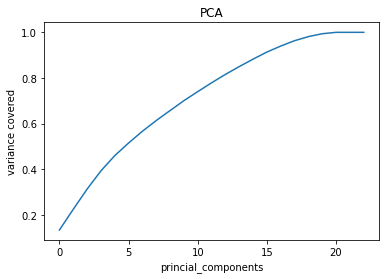

In [36]:
from sklearn.decomposition import PCA
pca=PCA()
components=pca.fit_transform(x_scaled)
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('princial_components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()
#I will use all 17 componets for model building 

In [40]:
principl_component=pd.DataFrame(components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21', 'PC22', 'PC23'])
principl_component.drop(['PC18','PC19','PC20','PC21', 'PC22', 'PC23'],inplace=True,axis=1)

In [57]:
principl_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,4.177610,-1.725152,1.245069,0.777667,0.117170,-0.657880,-0.484794,-0.497528,0.108610,0.139731,0.681104,-0.530924,-1.557583,-1.666121,-1.112976,0.296958,-0.073341
1,-0.406582,1.222745,-1.850483,-0.223494,0.315622,0.303896,0.308270,0.525645,-0.567466,0.680779,-0.642140,-1.518419,1.086643,-0.132980,0.605696,-1.275667,-0.947323
2,-0.535358,0.066618,-1.317729,0.128957,1.736407,-0.160759,0.498924,-0.044091,0.792669,-1.438532,-0.098243,-1.015170,0.620348,0.627881,-1.334261,-1.122186,-0.036619
3,-0.748245,0.024260,-0.273980,-1.029284,-0.363962,0.152989,0.085678,-1.904503,-0.187681,0.659488,0.259574,0.888489,0.423173,-0.592901,0.793754,0.237869,-0.526448
4,3.717661,1.621750,-1.276209,1.067207,-0.493064,0.430284,0.487603,0.008837,-0.848149,1.334449,-0.285232,0.728384,-0.996111,-0.052295,-0.137871,0.223968,0.634921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,2.379331,-2.617086,-0.103774,0.352000,0.509441,0.324608,-0.187420,1.867194,-0.031551,-0.351489,-0.734265,-0.051306,0.454467,1.255204,-0.589452,0.658756,-0.780913
10678,1.066945,1.040372,-0.507670,-2.143039,0.050895,-0.489337,1.402525,-0.852194,-1.281453,2.269546,0.220190,-0.511815,0.568123,-0.412916,1.038199,-0.659955,-0.883822
10679,1.008878,-0.558635,1.954266,-2.553492,0.510153,-0.333149,1.366045,-0.979574,-1.116334,2.082878,0.252614,-0.217660,0.799180,-0.787598,0.937022,-0.279158,-0.561625
10680,2.355643,-2.026806,1.517749,0.441063,0.517913,1.208283,0.156424,-0.877462,0.730207,-0.968698,-0.005421,-0.376919,-0.155193,0.752168,-0.434637,-0.937146,-1.057886


In [41]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(principl_component,y,test_size=0.25, random_state=100)

In [42]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
reg_accuracy=metrics.r2_score(y_test,y_pred)
print(reg_accuracy)

0.36445849948341147


In [43]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.08513324870454653


In [44]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.7967022461275662


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_clf=GradientBoostingRegressor()
gbdt_clf.fit(x_train,y_train)
y_pred=gbdt_clf.predict(x_test)
gbdt_clf_accuracy=metrics.r2_score(y_test,y_pred)
gbdt_clf_accuracy

0.5966823265037458

### will Go with random Forest

In [47]:
#Cross Validation
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    RFR.fit(x_train,y_train)
    pred_values = RFR.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8570100550232356, 0.8602585447481538, 0.8950376677236948, 0.8744586665397354, 0.8336544383724175]
Avg accuracy : 0.8640838744814474


### This cross validation scres looks very Promising, Lets go ahead hypertunning if possible

In [50]:
from sklearn.model_selection import GridSearchCV

RFR=RandomForestRegressor()
params={'n_estimators':[60,70,90],
        'criterion':['mse','gini'],
        'max_depth':[10,11,12,13,14,15,16,17,18,19,20],
         'min_samples_split':[10,11,15],
         'min_samples_leaf':[4,5]
       }
grd=GridSearchCV(RFR,param_grid=params,)
grd.fit(x_train,y_train)
RFR=grd.best_estimator_
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
RFR_accuracy

0.8144134637258977

In [ ]:
## Save th Model

In [51]:
with open("RFR", "wb") as f:
    pickle.dump(RFR, f)

In [ ]:
#tESTING THE mODEL WITH THE tEST DATAsET


### Test the price from Test set

In [52]:
Data_test
#Cleaned together with train dataset

,Airline,Source,Destination,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,...,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Time_Date,Arrival_Time_Month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
10683,4,2,1,0,0,0,0,1,0,0,...,6,6,17,30,6,6,4,25,10,55
10684,3,3,0,0,0,0,1,0,1,0,...,12,5,6,20,12,5,10,20,4,0
10685,4,2,1,0,0,0,0,1,0,0,...,21,5,19,15,21,5,19,0,23,45
10686,6,2,1,0,0,0,0,1,0,0,...,21,5,8,0,21,5,21,0,13,0
10687,0,0,2,0,0,0,0,0,0,0,...,24,6,23,55,24,6,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,3,0,0,0,0,1,1,0,0,...,6,6,20,30,6,6,20,25,23,55
13350,3,3,0,0,0,0,0,0,1,1,...,27,3,14,20,27,3,16,55,2,35
13351,4,2,1,0,0,0,0,1,0,0,...,6,3,21,50,6,3,4,25,6,35
13352,1,2,1,0,0,0,0,1,0,0,...,6,3,4,0,6,3,19,15,15,15


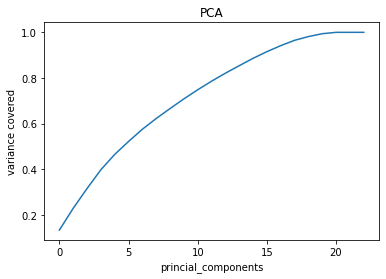

In [62]:
x_test=Data_test.drop(columns=['Price'],axis=1)
scaler=StandardScaler()
x_scaled_test=scaler.fit_transform(x_test)
#PCA componets of the test data
components_test=pca.fit_transform(x_scaled_test)
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('princial_components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [63]:
principl_component_test=pd.DataFrame(components_test,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21', 'PC22', 'PC23'])
#principl_component_test.drop(['PC18','PC19','PC20','PC21', 'PC22', 'PC23'],inplace=True,axis=1)

In [64]:
principl_component_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-1.401573,-0.846608,-1.516103,-0.639825,0.171947,-0.501366,-1.684732,-0.699838,0.827911,-0.657481,...,0.328146,0.976836,0.059687,0.326847,-0.047133,-0.533131,-0.428467,-0.055308,-1.109947e-15,-1.108713e-15
1,-1.076832,0.438022,-0.231309,1.984398,-0.845613,1.248252,0.194696,0.393450,-0.448291,0.975517,...,-0.501140,-0.224730,-0.704015,-1.314166,-1.392168,-0.595538,-0.942933,-0.301334,9.386188e-16,2.430605e-15
2,-1.742993,-0.651448,1.838110,-1.714058,0.220249,-0.860382,0.578780,-0.454062,-0.111161,-0.517252,...,1.398958,1.304916,1.334287,-0.129823,-0.240114,0.492694,0.112520,-0.039085,4.860548e-16,4.325557e-15
3,-1.847135,-1.138736,1.564984,-1.207946,-1.015225,1.473228,0.635051,0.863356,-1.109715,0.507406,...,0.154537,-0.160279,-0.150313,0.144939,-0.230119,0.068759,0.167499,-0.094612,2.140693e-16,-3.475137e-15
4,2.244789,-2.807840,0.245894,0.800091,2.533096,-0.721543,-1.110094,-0.163110,0.879185,-1.302080,...,-0.481593,0.326658,-0.691849,-0.352786,-0.162032,-0.075607,-0.300429,0.239270,-2.216488e-16,5.743793e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,-2.625047,0.643511,-1.002944,0.274260,0.607781,0.243769,-0.899019,-0.228901,0.666268,-2.128181,...,0.428713,1.412613,-0.126541,0.407573,-0.137253,0.742376,-0.382286,-0.017447,9.214733e-17,-1.462674e-16
2667,1.940061,0.079386,2.291723,2.524220,-0.625708,-1.645551,-0.506385,1.273952,0.109332,-0.487641,...,0.938205,-1.008486,-0.136751,-0.195557,-0.898344,0.213052,-0.064546,-0.021313,3.034902e-16,2.081082e-16
2668,0.382668,0.959031,-0.458954,-1.291472,-1.705040,-1.096769,-1.246913,-0.169155,0.504774,-1.565527,...,-0.386195,0.438605,-0.338116,-0.935882,0.041508,-0.426630,-0.598591,0.278896,1.390696e-17,2.710454e-16
2669,-0.498011,1.594565,0.105914,-1.836762,-1.363332,1.171975,-0.737537,1.150373,-0.437067,-0.095594,...,1.366524,-0.617552,-0.941411,-0.244568,-0.456771,0.448467,0.075001,0.043197,3.234087e-17,-3.366503e-16


In [65]:
y_pred=RFR.predict(principl_component_test)

In [69]:
y_pred=pd.DataFrame(y_pred)

In [70]:
writer=pd.ExcelWriter('Output.xlsx')
y_pred.to_excel(writer,"output", header=True, index= False)
writer.save()